# 1. Imports, data loading and initial data inspection <a class="anchor" id="importing-data"></a>

### 1.1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import folium
import json
from folium.plugins import TimeSliderChoropleth
from branca.element import Template, MacroElement

### 1.2 Data Loading and Initial Data Inspection

In [2]:
df_wb = pd.read_csv("wellbeing.csv")  # WELLBEING

df_mr = pd.read_csv("material_flow.csv")  # MINERALS

In [3]:
display(df_wb.head()) # head of unfiltered dataset
display(df_wb.columns)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.6,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.8,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.5,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.8,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.6,NaN,A,Normal value,0,Units,2,Two,NaN,NaN


Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'MEASURE', 'Measure', 'UNIT_MEASURE',
       'Unit of measure', 'AGE', 'Age', 'SEX', 'Sex', 'EDUCATION_LEV',
       'Education level', 'DOMAIN', 'Domain', 'TIME_PERIOD', 'Time period',
       'OBS_VALUE', 'Observation value', 'OBS_STATUS', 'Observation status',
       'UNIT_MULT', 'Unit multiplier', 'DECIMALS', 'Decimals', 'BASE_PER',
       'Base period'],
      dtype='object')

In [4]:
display(df_mr.head())
display(df_mr.columns)

,Country,Category,Flow name,Flow code,Flow unit,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Biomass,Domestic Extraction,DE,t,29427854.0,28777035.0,27200896.0,29147772.0,30519158.0,...,37406375.0,37961488.0,35542253.0,33625557.0,39501360.0,41190154.0,37576686.0,37891437.0,38353304.0,38628527.0
1,Afghanistan,Biomass,Domestic Material Consumption,DMC,t,29476560.0,29136965.0,27290656.0,29112673.0,30433539.0,...,40423146.0,41655757.0,40992559.0,38552083.0,43433438.0,45294467.0,39730808.0,40083922.0,40596386.0,40905900.0
2,Afghanistan,Biomass,Domestic Material Input,DMI,t,29617873.0,29282898.0,27485608.0,29306247.0,30656605.0,...,40740301.0,42111457.0,41553874.0,39515927.0,44428717.0,46059807.0,40992155.0,41370148.0,41905797.0,42238460.0
3,Afghanistan,Biomass,Exports,EXP,t,141313.0,145933.0,194952.0,193574.0,223066.0,...,317155.0,455700.0,561315.0,963844.0,995279.0,765341.0,1261347.0,1286226.0,1309411.0,1332559.0
4,Afghanistan,Biomass,Imports,IMP,t,190019.0,505863.0,284712.0,158475.0,137447.0,...,3333926.0,4149969.0,6011621.0,5890371.0,4927357.0,4869653.0,3415470.0,3478710.0,3552492.0,3609933.0


Index(['Country', 'Category', 'Flow name', 'Flow code', 'Flow unit', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [5]:
# used to print the measurement unit
def find_unit(value):
    conversion = {
        "kt" : 1_000,
        "Mt" : 1_000_000,
        "Gt" : 1_000_000_000
    }
    
    for unit, threshold in reversed(conversion.items()):
        if value >= threshold:
            return unit
    
    return "t"

# function to plot a sub-dataset based on a few parameters
def plot_flow_category(data, flow, category, years, ylabel = False, debug = False):
    years_filter = ["Country"] + [str(y) for y in years] 

    data_filters = (data["Flow name"] == flow) & (data["Category"] == category)

    # Filter for this chart only
    data = data[data_filters][years_filter]

    data = data.dropna()

    maximum_year = str(max(years))
    data = data[data[maximum_year] > 0]

    # Sort descending
    data = data.sort_values(maximum_year, ascending=False)

    data = data.head()

    if debug:
        print(data)
        return    

    melted_df = pd.melt(
        data,
        id_vars=["Country"],
        value_vars=years_filter,
        var_name="Year",
        value_name="Value"
    )

    plot = sns.barplot(
        data=melted_df,
        x="Country",
        y="Value",
        hue="Year",
        palette="viridis"
    )

    plt.xticks(data["Country"], rotation=45)
    plot.yaxis.offsetText.set_visible(False)

    plt.xlabel("Country")
    
    if ylabel:
        plt.ylabel(f"{ylabel}")
    else:
        max_value = max(
            value for col in data.columns for value in data[col] 
            if isinstance(value, (int, float))
        )
        
        plt.ylabel(f"{flow} ({find_unit(max_value)})")  # Use the flow unit from the data

    plt.title(f"{flow} by Country for Selected Years")
    plt.legend(title="Year")

    plt.show()    

# 2. Filtering and cleaning data <a class="anchor" id="cleaning-data"></a>

### 2.1 Filtering functions

In [6]:
# function to filter data from the minerals dataset
def filter_minerals(data, flow_name = "", category = "", year = [2023]):
    data = data[(data["Category"] == category) & (data["Flow name"] == flow_name)]

    year = str(year)
    data = data[["Country", year]]
    data = data.rename(columns={year: "Minerals"})

    data = data.dropna()

    return data
    
# function to filter data from the wellbeing dataset
def filter_wellbeing(data, measure, domain, year = 2023, age = "total", sex = "total", edu = "total"):
    data = data[(data["Measure"] == measure) & (data["Domain"] == domain) & (data["TIME_PERIOD"] == year)]
    
    ''' parameters possible options
    age = total/young/mid/old
    sex = total/male/female
    edu = total/primary/secondary/tertiary
    '''
    
    age = age.capitalize()
    sex = sex.capitalize()
    edu = edu.capitalize()

    # correcting received parameters for ease of use
    if age == "Mid":
        age = "Middle-aged"
    if edu != "Total":
        edu = edu + " education"

    data = data[data["Age"] == age]
    data = data[data["Sex"] == sex]
    data = data[data["Education level"] == edu]

    # data = data.dropna()
    
    return data

### 2.2 Dropping unused/duplicate columns and rows

In [7]:
# clearing rows from a dataset matching a given parameter
def remove_rows_from_dataset(rows, df):
    return df[~df["Country"].isin(rows)]

# clearing unused or duplicate columns
def remove_columns_from_dataset(rows, df):
    df = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')
    return df

# removing rows related to continents and organisations, needing only countries from the minerals dataset
rows_to_remove = ["World", "Asia + Pacific", "North America", "EECCA", "West Asia", "Africa", "Europe", "Latin America + Caribbean"]
df_mr = remove_rows_from_dataset(rows_to_remove, df_mr)

# removing unused columns
columns_to_remove = ["STRUCTURE", "STRUCTURE_ID", "STRUCTURE_NAME", "ACTION", "MEASURE", "UNIT_MEASURE", "Unit of measure", "AGE", "SEX", "EDUCATION_LEV", "DOMAIN", "Time period", "Observation value", "OBS_STATUS", "UNIT_MULT", "Unit multiplier", "Units", "DECIMALS", "Decimals", "Base period", "BASE_PER"]
df_wb = remove_columns_from_dataset(columns_to_remove, df_wb)

### 2.3 Check for missing values

In [8]:
missing_per_column_minerals = df_mr.isnull().sum()
print("Missing values per column in minerals dataset:")
print(missing_per_column_minerals[missing_per_column_minerals > 0])

missing_per_column_wellbeing = df_wb.isnull().sum()
print("Missing values per column in wellbeing dataset:")
print(missing_per_column_wellbeing[missing_per_column_wellbeing > 0])

Missing values per column in minerals dataset:
1970    1687
1971    1687
1972    1687
1973    1687
1974    1687
1975    1687
1976    1687
1977    1687
1978    1687
1979    1687
1980    1687
1981    1687
1982    1687
1983    1687
1984    1687
1985    1687
1986    1687
1987    1687
1988    1687
1989    1687
1990    1687
1991    1687
1992     414
1993     343
1994     343
1995     343
1996     343
1997     343
1998     343
1999     343
2000     343
2001     343
2002     343
2003     343
2004     343
2005     343
2006     284
2007     284
2008     284
2009     284
2010     284
2011     284
2012     284
2013     284
2014     284
2015     284
2016     284
2017     284
2018     284
2019     284
2020     284
2021     284
2022     284
2023     284
2024     284
dtype: int64
Missing values per column in wellbeing dataset:
Series([], dtype: int64)


### 2.4 Replacing names for correct map plot assignations

In [9]:
def replace_country_names(df, name_dict, column="name"):
    df[column] = df[column].replace(name_dict)
    return df

# Usage example:
country_replacements = {
    "Russian Federation": "Russia",
    "Czechia": "Czech Republic",
    "Viet Nam": "Vietnam"
}

df_mr = replace_country_names(df_mr, country_replacements, column="Country")
df_wb = replace_country_names(df_wb, country_replacements, column="Reference area")

### 2.5 Unique values for columns of interest

In [10]:
# minerals dataset available unique values from Category column
categories = df_mr["Category"].drop_duplicates().values
categories

array(['Biomass', 'Excavated earthen materials (including soil) nec',
       'Fossil fuels', 'Metal ores', 'Mixed and complex products nec.',
       'Non-metallic minerals', 'Products from biomass',
       'Products from fossil fuels', 'Products from metals',
       'Products from non-metallic minerals',
       'Waste for final treatment and disposal'], dtype=object)

In [11]:
# minerals dataset available unique values from Flow name column
flows = df_mr["Flow name"].drop_duplicates().values
flows

array(['Domestic Extraction', 'Domestic Material Consumption',
       'Domestic Material Input', 'Exports', 'Imports',
       'Material Footprint (RMC)', 'Physical Trade Balance',
       'Raw Material Equivalents of exports',
       'Raw Material Equivalents of imports'], dtype=object)

In [12]:
# wellbeing dataset available unique values in the Measure column
measures = df_wb["Measure"].drop_duplicates().values
measures

array(['Homicides', 'Feeling safe at night', 'Not feeling safe at night',
       'Life satisfaction', 'Life satisfaction score less than 5',
       'Negative affect balance', 'Feelings of physical pain',
       'Median net wealth', 'Employment rate', 'Gender wage gap',
       'Long-term unemployment rate',
       'Youth not in employment, education or training',
       'Labour market insecurity', 'Job strain',
       'Long hours in paid work',
       'Full-time employees earning less than two-thirds of gross median earnings',
       'Job satisfaction', 'Households living in overcrowded conditions',
       'Time off', 'Satisfaction with time use',
       'Satisfaction with time use score less than 5',
       'Life expectancy at birth', 'Perceived health as positive',
       'Perceived health as negative',
       'Deaths from suicide, alcohol, drugs', 'Self-reported depression',
       'Student mathematics skills', 'Student science skills',
       'Students with low skills in reading, ma

In [13]:
# wellbeing dataset available unique values in the Measure column
domains = df_wb["Domain"].drop_duplicates().values
domains

array(['Safety', 'Subjective well-being', 'Income and wealth',
       'Work and job quality', 'Housing', 'Work-life balance', 'Health',
       'Knowledge and skills', 'Social connections', 'Civic engagement',
       'Environmental quality'], dtype=object)

### 2.6 Map plotting helper functions

In [14]:
def plot_map_static(data, year):
    shapefile_path = "map/ne_110m_admin_0_countries.shp"  # Might come in handy https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
    world = gpd.read_file(shapefile_path)

    world = world.merge(data, how="left", left_on="NAME", right_on="Country")

    # Set up the figure
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))

    # Define a colormap using Seaborn
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    # Plot the world map with values
    world.plot(column=year, cmap=cmap, linewidth=0.8, edgecolor="black", legend=True, ax=ax)

    # Customize plot appearance
    ax.set_title("World Map with Values per Country", fontsize=14)
    ax.axis("off")  # Hide axis

    # Show plot
    plt.show()

def plot_map(data, column = "Minerals", title = ""):
    year = data.columns[1]
    geo_json_path = "map/folium/world-countries.json"

    with open(geo_json_path, "r") as f:
        geo_json_data = f.read()
        geo_json_data = json.loads(geo_json_data)

    m = folium.Map(location=[20, 0], zoom_start=2)

    # Create a dictionary mapping country names to 2023 values
    value_map = dict(zip(data['Country'], data[f'{year}']))

    # Inject into GeoJSON properties
    for feature in geo_json_data['features']:
        country_name = feature['properties']['name']
        feature['properties']['value'] = value_map.get(country_name, 'N/A')

    folium.Choropleth(
        geo_data=geo_json_data,
        name='choropleth',
        data=data,
        columns=['Country', column],
        key_on='properties.name',  # 'id' in GeoJSON must match REF_AREA (ISO codes)
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Value per Country',
    ).add_to(m)

    folium.GeoJson(
        geo_json_data,
        name="Country Names",
        style_function=lambda feature: {
            'fillColor': 'transparent',
            'color': 'black',
            'weight': 0.3,
            'fillOpacity': 0
        },
        tooltip=folium.features.GeoJsonTooltip(
            fields=['name', 'value'],
            aliases=["Country:", "Value:"],
            localize=True
        )
    ).add_to(m)

    title_html = f'<h1 style="position:absolute;z-index:1000;left:40vw" >{title}</h1>'

    m.get_root().html.add_child(folium.Element(title_html))

    display(m)

# 3. Extended Analysis

### 3.1 Global variables stored

In [15]:
# global variable for storing the selected years
YEARS = [y for y in range(1970, 2025, 27)]

### 3.2 Visualization

##### 3.2.1 Univariate Analysis

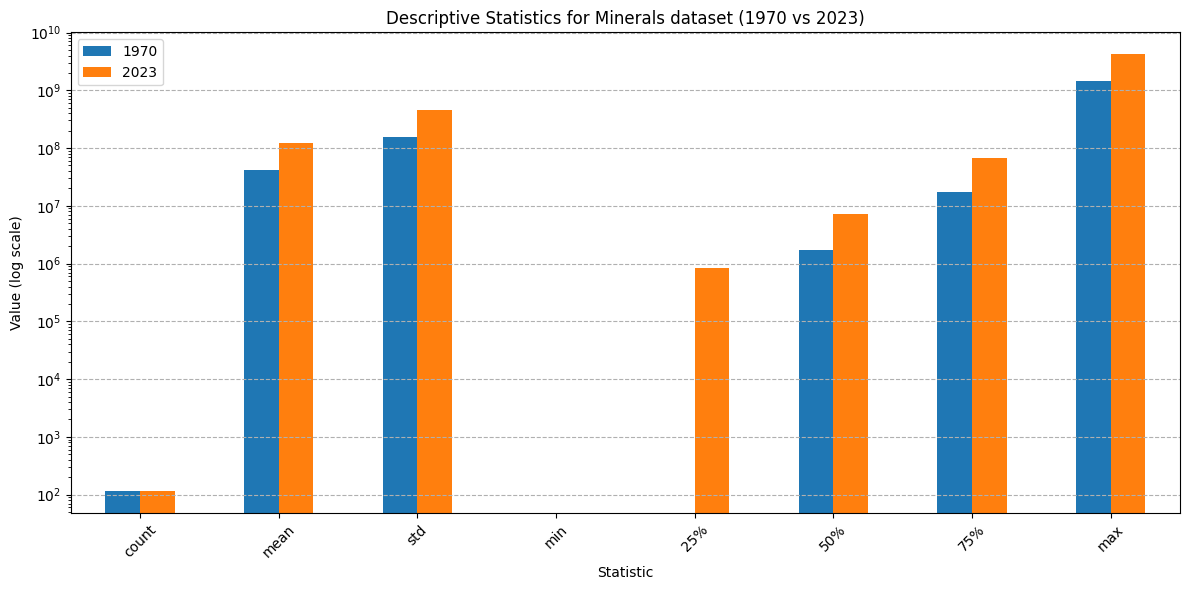

In [16]:
df_mr_dist = df_mr[(df_mr["Flow name"] == "Domestic Extraction") & (df_mr["Category"] == "Fossil fuels")]
df_mr_dist = df_mr_dist[['Country', '1970', '2023']]
df_mr_dist = df_mr_dist.dropna()
df_mr_dist = df_mr_dist.describe()

df_mr_dist.plot(kind='bar', figsize=(12,6), logy=True)  # log scale for readability
plt.title('Descriptive Statistics for Minerals dataset (1970 vs 2023)')
plt.xlabel('Statistic')
plt.ylabel('Value (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

##### 3.2.2 Multivariate Analysis

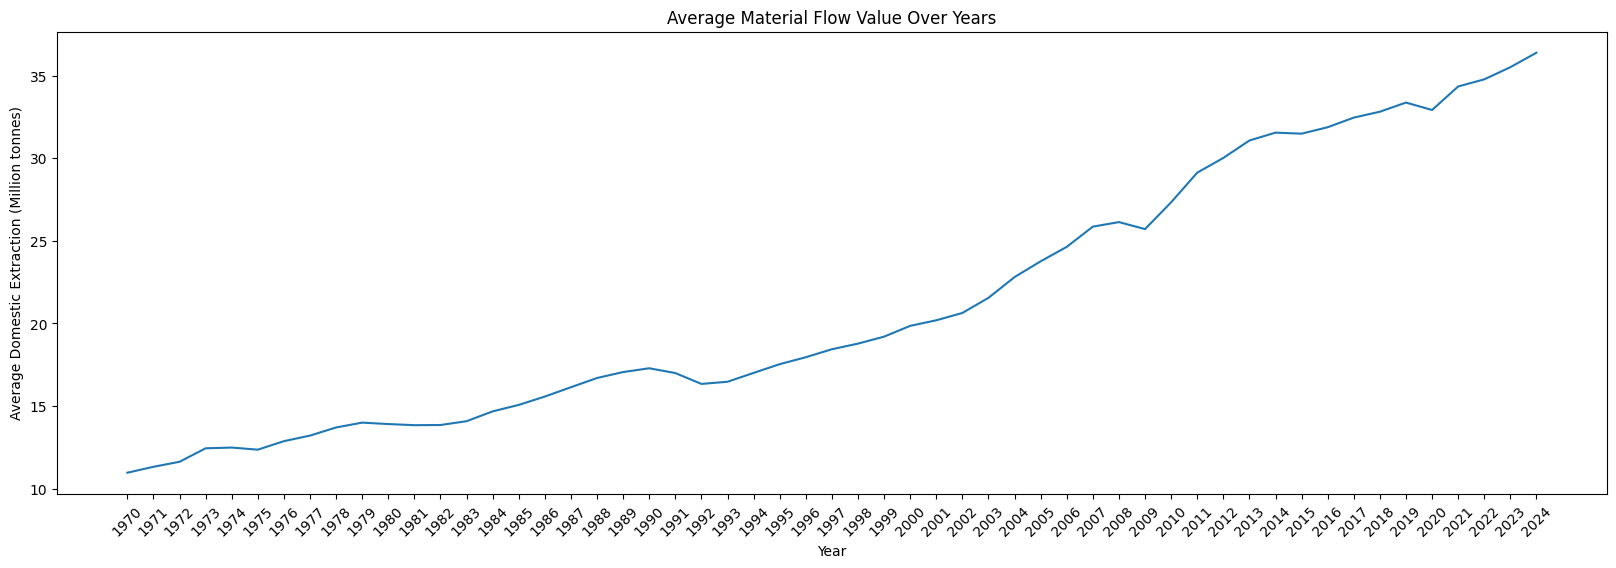

In [17]:
minerals_melted = df_mr.melt(id_vars=['Country', 'Category', 'Flow name', 'Flow code', 'Flow unit'], var_name='Year', value_name='Value')
avg_value_per_year = minerals_melted.groupby('Year')['Value'].mean().reset_index()

avg_value_per_year['Value'] = avg_value_per_year['Value'] / 1_000_000

# Line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=avg_value_per_year, x='Year', y='Value')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Average Material Flow Value Over Years')
plt.xlabel('Year')
# rotate x labels for better readability
plt.xticks(rotation=45)
plt.ylabel('Average Domestic Extraction (Million tonnes)')
plt.show()

Observation: An analysis of material flow data reveals notable declines in the years 2009 and 2020, coinciding with significant global economic downturns. These patterns underscore the sensitivity of material flows to global economic conditions, highlighting how major crises can lead to substantial reductions in resource extraction and consumption.

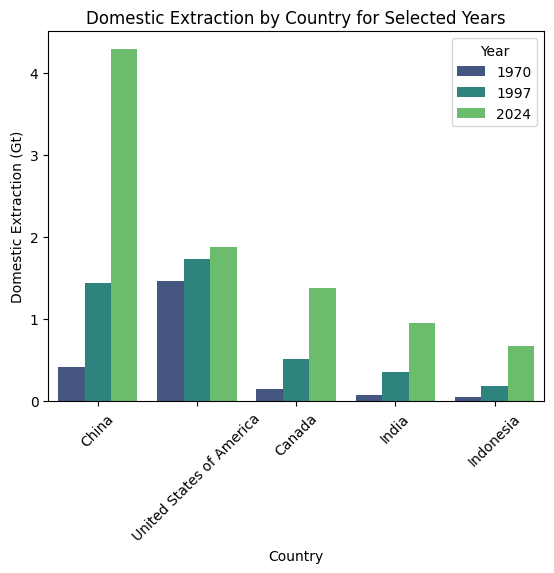

In [18]:
plot_flow_category(df_mr, flow = "Domestic Extraction", category = "Fossil fuels", years = YEARS)

Observation: In the above plot, the major players in the industry of domestic extraction of fossil fuels are displayed, along with their evolution on 3 equidistant year landmarks.

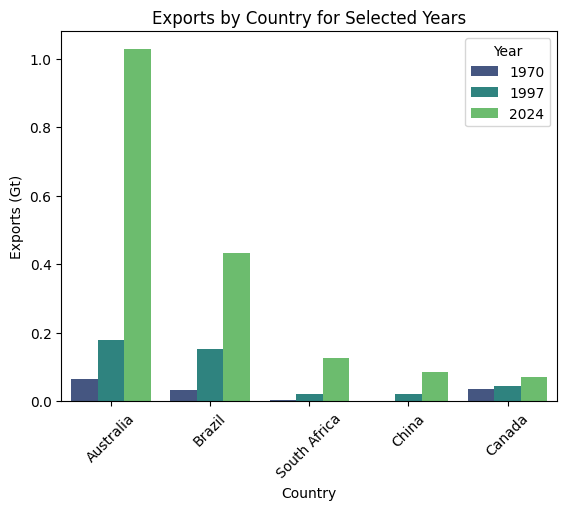

In [19]:
plot_flow_category(df_mr, flow = "Exports", category = "Metal ores", years = YEARS)

Observation: Above it is displayed a plot about the major countries that export metal ores, on the same 3 year landmarks

In [ ]:
df_current = filter_minerals(df_mr, flow_name = "Domestic Extraction", category = "Fossil fuels", year = 2023)
plot_map(df_current, title = "Domestic Extraction of Fossil Fuels in 2023")

KeyError: 'Domestic Extraction of Fossil Fuels in 2023'

In [ ]:
df_current = filter_minerals(df_mr, flow_name = "Domestic Extraction", category = "Fossil fuels", year = 2005)
plot_map(df_current)

In [ ]:
life_satisfaction = filter_wellbeing(df_wb, "Life satisfaction", "Subjective well-being", 2018)
domestic_extraction_fossil_fuels = filter_minerals(df_mr, "Domestic Extraction", "Fossil fuels", 2018)
merged1 = life_satisfaction.merge(domestic_extraction_fossil_fuels, left_on='Reference area', right_on='Country')
merged1

,REF_AREA,Reference area,Measure,Age,Sex,Education level,Domain,TIME_PERIOD,OBS_VALUE,Observation status,Country,Minerals
0,COL,Colombia,Life satisfaction,Total,Total,Total,Subjective well-being,2018,8.262497,Normal value,Colombia,1.454831e+08
1,AUT,Austria,Life satisfaction,Total,Total,Total,Subjective well-being,2018,8.002416,Normal value,Austria,1.407566e+06
2,DNK,Denmark,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.761102,Normal value,Denmark,8.767214e+06
3,POL,Poland,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.731018,Normal value,Poland,1.258701e+08
4,CAN,Canada,Life satisfaction,Total,Total,Total,Subjective well-being,2018,8.100000,Normal value,Canada,1.219686e+09
5,NLD,Netherlands,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.695520,Normal value,Netherlands,2.438103e+07
6,SVN,Slovenia,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.248028,Normal value,Slovenia,3.228941e+06
7,NZL,New Zealand,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.700000,Normal value,New Zealand,7.590316e+06
8,NOR,Norway,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.980364,Normal value,Norway,1.732830e+08
9,HUN,Hungary,Life satisfaction,Total,Total,Total,Subjective well-being,2018,6.506272,Normal value,Hungary,1.017654e+07


<Figure size 2000x3000 with 0 Axes>

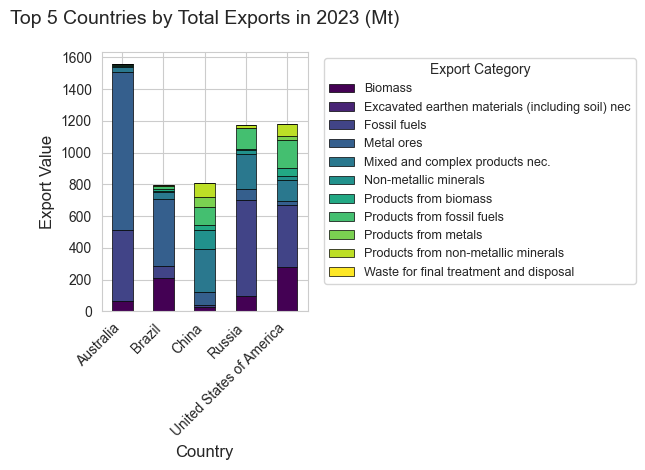

In [ ]:
exports = df_mr[["Country", "Category", "Flow name", "2023"]][df_mr["Flow name"] == "Exports"]

exports["2023"] = exports["2023"] / 1000000

country_totals = exports.groupby('Country')['2023'].sum()
top_countries = country_totals.nlargest(5).index

df_top5 = exports[exports['Country'].isin(top_countries)]

pivot_df = df_top5.pivot(index='Country', columns='Category', values='2023').fillna(0)

plt.figure(figsize=(20, 30))

sns.set_style("whitegrid")
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', linewidth=0.5)

plt.title('Top 5 Countries by Total Exports in 2023 (Mt)', fontsize=14, pad=20)
plt.ylabel('Export Value', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Export Category', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           fontsize=9)

plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()

plt.show()

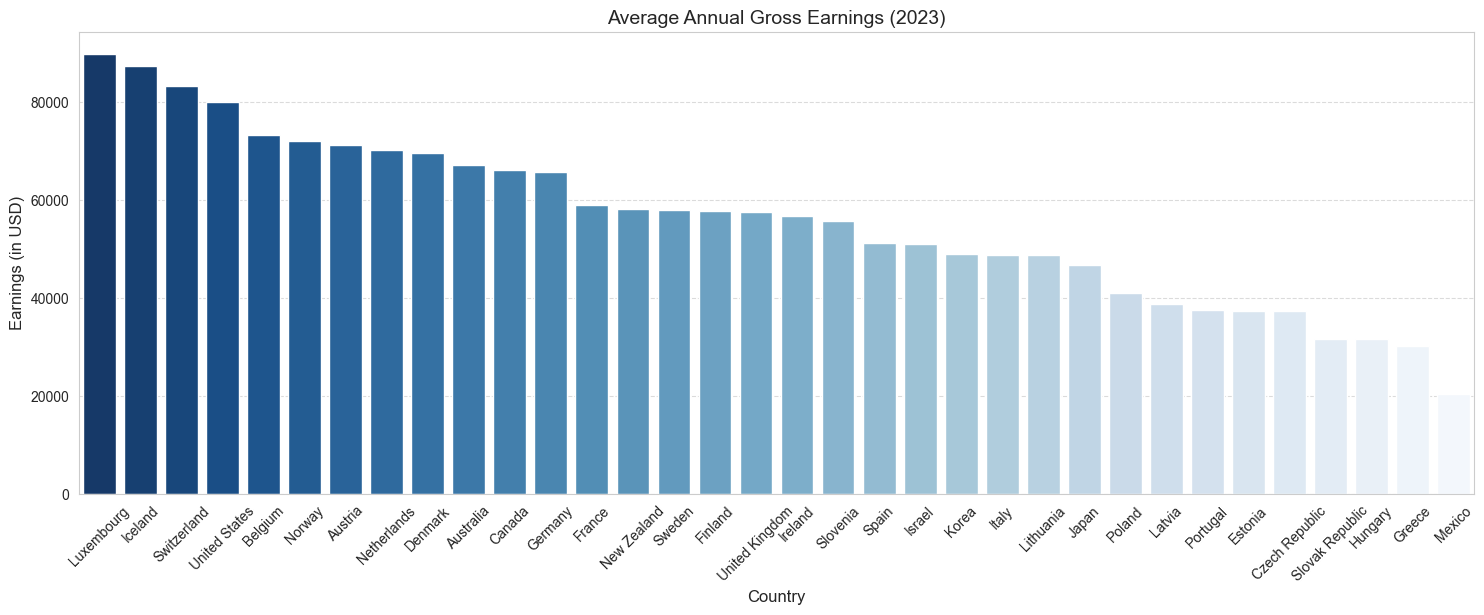

In [ ]:
annual_earnings = filter_wellbeing(df_wb, "Average annual gross earnings", "Work and job quality", 2023)
annual_earnings = annual_earnings.sort_values("OBS_VALUE", ascending=False)

plt.figure(figsize=(18, 6))

sns.barplot(data=annual_earnings, x="Reference area", y="OBS_VALUE", hue="Reference area", palette="Blues_r")

plt.title("Average Annual Gross Earnings (2023)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Earnings (in USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

<Figure size 2000x600 with 0 Axes>

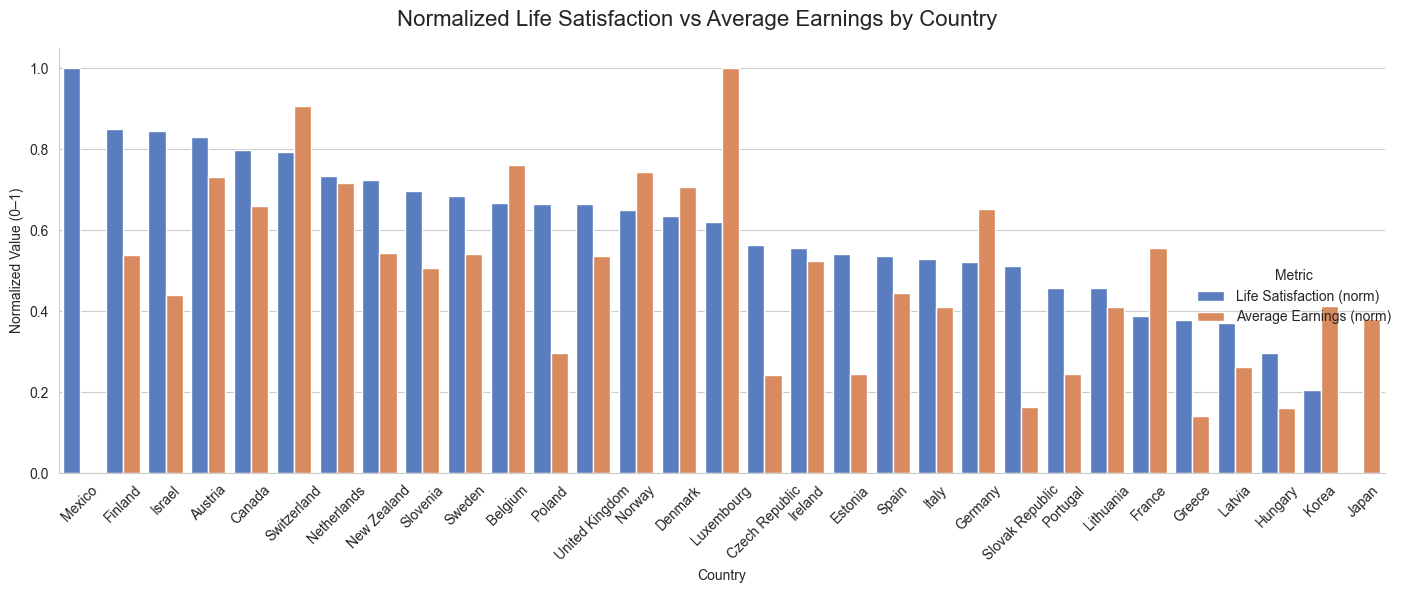

In [ ]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_current = filter_wellbeing(df_wb, "Life satisfaction", "Subjective well-being", 2021)
# print(df_current[["REF_AREA", "Reference area", "OBS_VALUE"]].head())
# print(annual_earnings[["REF_AREA", "Reference area", "OBS_VALUE"]].head())

merged_df = pd.merge(df_current, annual_earnings, on='REF_AREA')

merged_df = merged_df[["REF_AREA", "Reference area_x", "OBS_VALUE_x", "OBS_VALUE_y"]]

merged_df['Life Satisfaction (norm)'] = normalize(merged_df['OBS_VALUE_x'])
merged_df['Average Earnings (norm)'] = normalize(merged_df['OBS_VALUE_y'])

merged_df = merged_df.sort_values(by='Life Satisfaction (norm)', ascending=False)

plot_df = pd.melt(
    merged_df,
    id_vars='Reference area_x',
    value_vars=['Life Satisfaction (norm)', 'Average Earnings (norm)'],
    var_name='Metric',
    value_name='Normalized Value'
)

avg_life = merged_df['Life Satisfaction (norm)'].mean()
avg_earn = merged_df['Average Earnings (norm)'].mean()

# Append average rows
average_data = pd.DataFrame({
    'Country': ['Average', 'Average'],
    'Metric': ['Life Satisfaction (norm)', 'Average Earnings (norm)'],
    'Normalized Value': [avg_life, avg_earn]
})

plot_df = pd.concat([plot_df, average_data], ignore_index=True)

plt.figure(figsize=(20, 6))

g = sns.catplot(
    data=plot_df,
    kind='bar',
    x='Reference area_x',
    y='Normalized Value',
    hue='Metric',
    height=6,
    aspect=2,
    palette='muted'
)

# Customize the plot
g.set_axis_labels('Country', 'Normalized Value (0–1)')
g.fig.suptitle('Normalized Life Satisfaction vs Average Earnings by Country', fontsize=16)
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

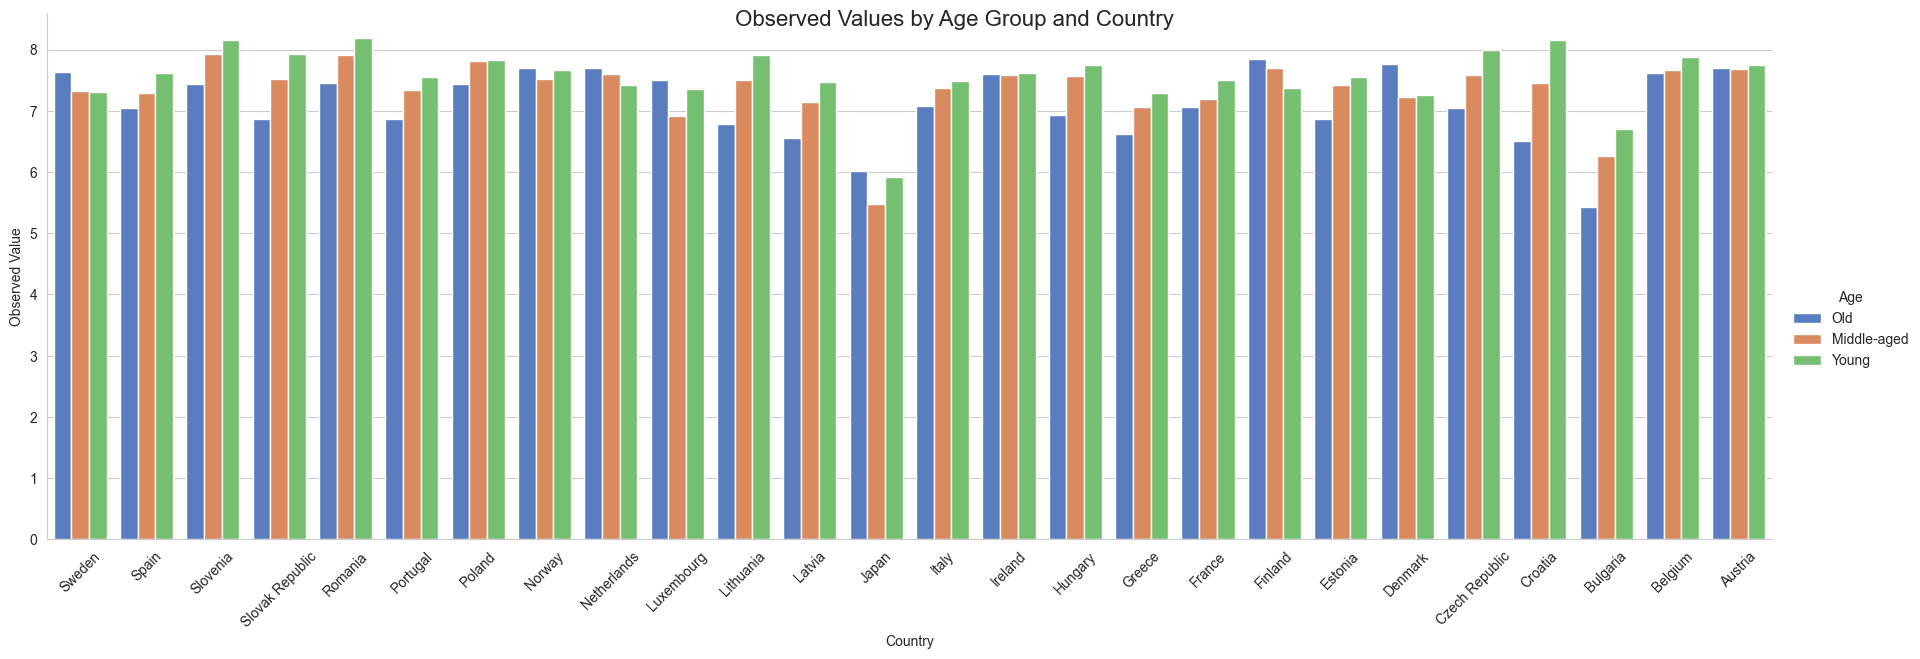

In [ ]:
df_life_satisfaction_age = df_wb[(df_wb["Measure"] == "Life satisfaction") & (df_wb["Domain"] == "Subjective well-being") & (df_wb["TIME_PERIOD"] == 2023) & (df_wb["Age"] != "Total")]
df_life_satisfaction_age = df_life_satisfaction_age[["Reference area", "Age", "OBS_VALUE"]]
df_life_satisfaction_age = df_life_satisfaction_age.sort_values(["Reference area", "OBS_VALUE"], ascending=[False, False])

# Count how many unique age groups each country has
age_counts = df_life_satisfaction_age.groupby('Reference area')['Age'].nunique()

# Filter for countries with exactly 3 age groups
valid_countries = age_counts[age_counts == 3].index
filtered_df = df_life_satisfaction_age[df_life_satisfaction_age['Reference area'].isin(valid_countries)]

g = sns.catplot(
    data=filtered_df,
    kind='bar',
    x='Reference area',
    y='OBS_VALUE',
    hue='Age',
    height=6,
    aspect=3,
    palette='muted'
)

# === Step 3: Customize the plot ===

g.set_axis_labels('Country', 'Observed Value')
g.fig.suptitle('Observed Values by Age Group and Country', fontsize=16)
g.set_xticklabels(rotation=45)
plt.show() 

In [ ]:
df_mfp = df_mr[df_mr["Flow name"] == "Material Footprint (RMC)"]
df_mfp = df_mfp[["Country", "2023"]]

# make the sum of all values for each country
df_mfp = df_mfp.groupby("Country").sum().reset_index()

plot_map(df_mfp, "2023", "Material Footprint (RMC) in 2023")

### 3.x Anomalies

In [ ]:
# correlation = merged1["OBS_VALUE"].corr(merged1["Minerals"])

shapefile_path = "map/ne_110m_admin_0_countries.shp"  # Might come in handy https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
world = gpd.read_file(shapefile_path)

# print(merged1)

merged1 = merged1[["Reference area", "OBS_VALUE", "Minerals"]]

world = world.merge(merged1, how="left", left_on="NAME", right_on="Reference area")

print(world[["NAME", "Reference area"]][world["Reference area"].isna()])

# world["OBS_VALUE"] = world["OBS_VALUE"].fillna(0)
# world["Minerals"] = world["Minerals"].fillna(0)

# world["OBS_VALUE Norm"] = world["OBS_VALUE"] / world["OBS_VALUE"].max()

# fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# world.plot(column="Minerals", cmap="coolwarm", linewidth=0.8, edgecolor="black",
#            legend=True, legend_kwds={'label': "Mineral Extraction (Tonnes)", 'orientation': "horizontal"},
#            alpha=world["OBS_VALUE Norm"])  # Opacity based on minerals

# # Remove axis for better aesthetics
# ax.set_axis_off()

# # Show the plot
# plt.title("Correlation between Life Satisfaction and Mineral Extraction")
# plt.show()

                         NAME Reference area
0                        Fiji            NaN
1                    Tanzania            NaN
2                   W. Sahara            NaN
4    United States of America            NaN
5                  Kazakhstan            NaN
..                        ...            ...
172                    Serbia            NaN
173                Montenegro            NaN
174                    Kosovo            NaN
175       Trinidad and Tobago            NaN
176                  S. Sudan            NaN

[149 rows x 2 columns]
